In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import probplot
from statsmodels.graphics.gofplots import qqplot
#To load data
path="rows.csv"
df=pd.read_csv(path)

# Box plot of EV percentage by vehicle type

C:\Users\paulp\AppData\Local\Temp\ipykernel_4768\3264622968.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Vehicle Primary Use', y='Percent Electric Vehicles',


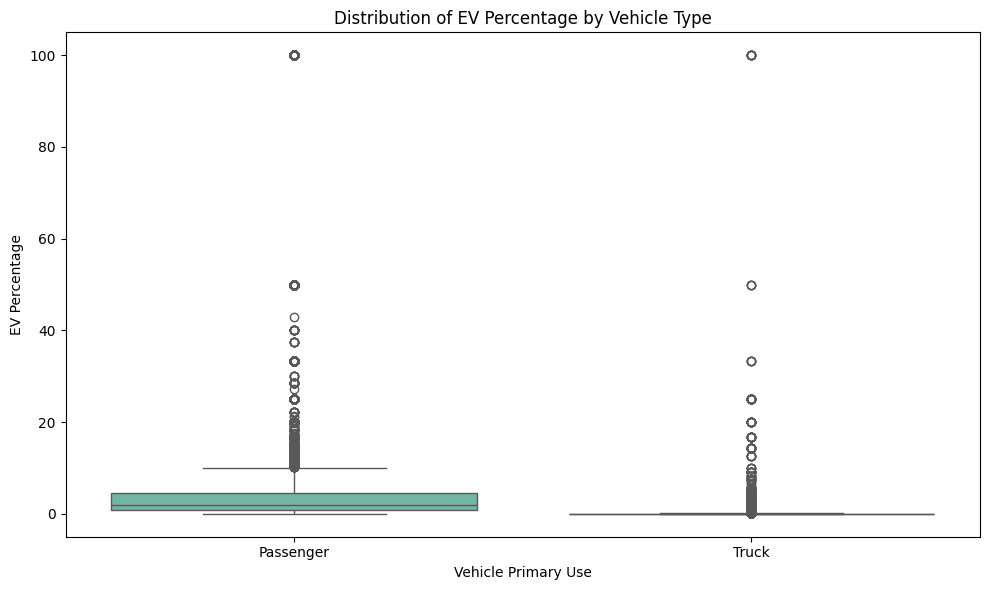

In [2]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Vehicle Primary Use', y='Percent Electric Vehicles', 
            palette='Set2')
plt.title('Distribution of EV Percentage by Vehicle Type')
plt.xlabel('Vehicle Primary Use')
plt.ylabel('EV Percentage')
plt.tight_layout()
plt.show()

# Donut chart of BEVs vs PHEVs

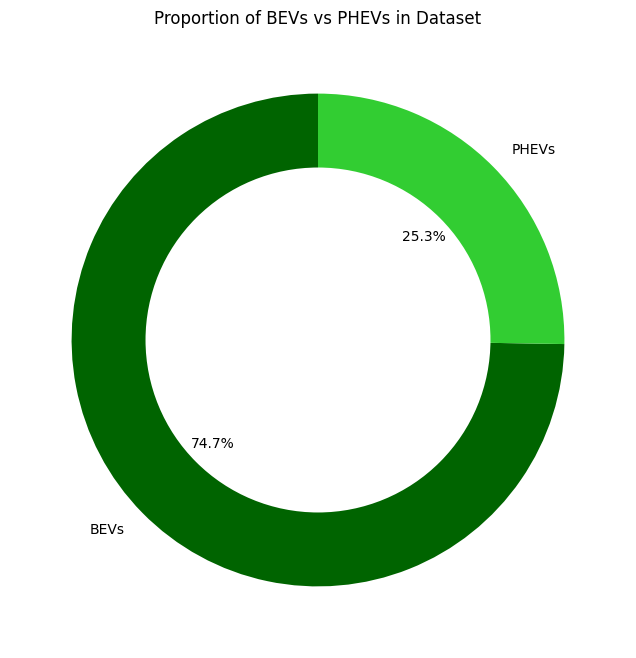

In [3]:
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

plt.figure(figsize=(8, 8))
plt.pie([bev_total, phev_total], labels=['BEVs', 'PHEVs'], 
        autopct='%1.1f%%', startangle=90, colors=['darkgreen', 'limegreen'])
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Proportion of BEVs vs PHEVs in Dataset')
plt.show()

# Scatter plot: EV Total vs Non-Electric Vehicle Total

C:\Users\paulp\AppData\Local\Temp\ipykernel_4768\2607631646.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


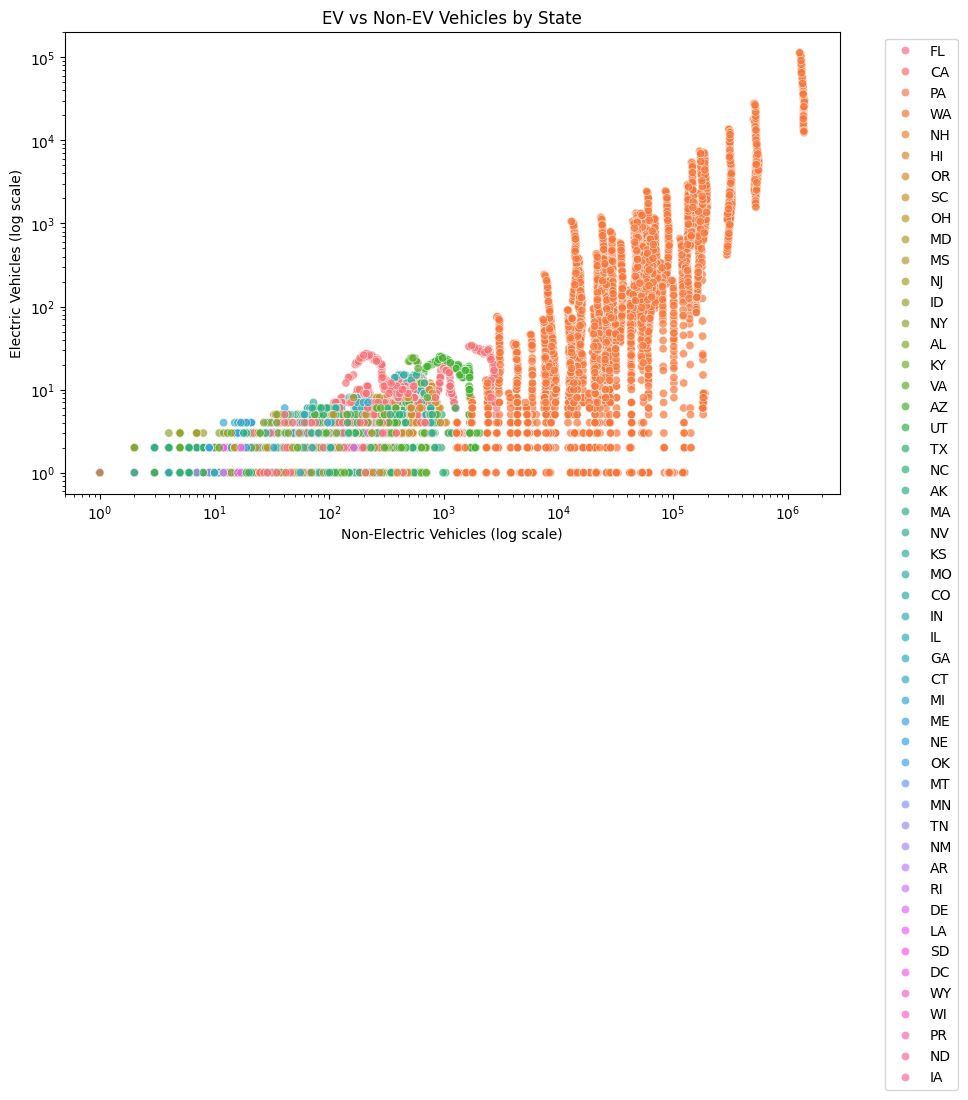

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Non-Electric Vehicle Total', y='Electric Vehicle (EV) Total', 
                hue='State', alpha=0.7)
plt.title('EV vs Non-EV Vehicles by State')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Non-Electric Vehicles (log scale)')
plt.ylabel('Electric Vehicles (log scale)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Bar plot of top 10 states by EV percentage

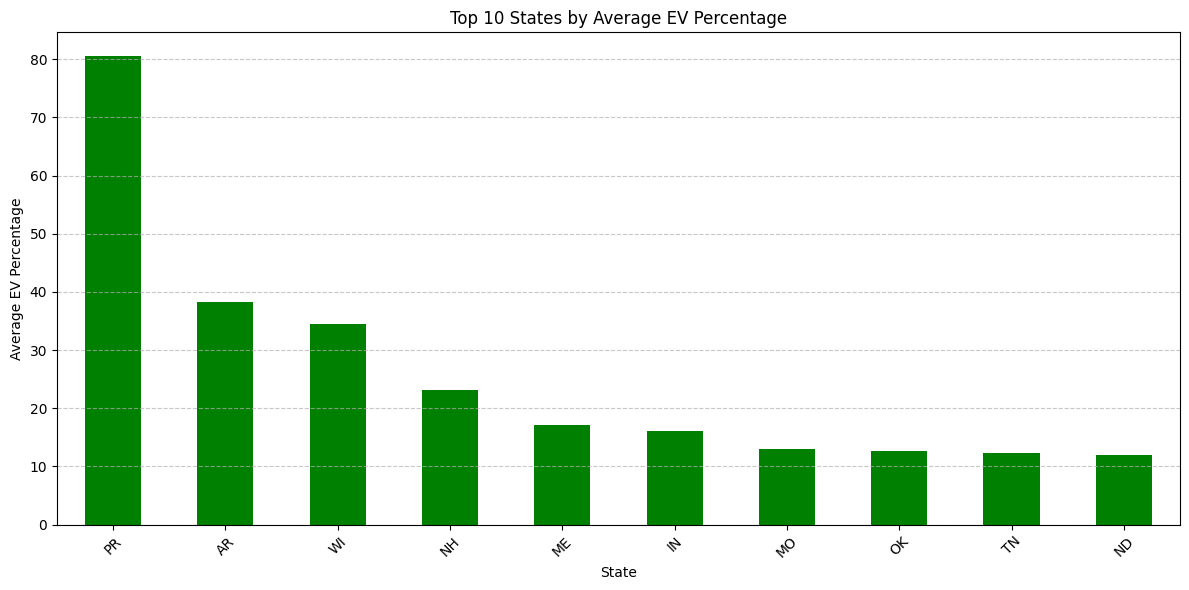

In [6]:
state_ev = df.groupby('State')['Percent Electric Vehicles'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
state_ev.plot(kind='bar', color='green')
plt.title('Top 10 States by Average EV Percentage')
plt.ylabel('Average EV Percentage')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()